In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


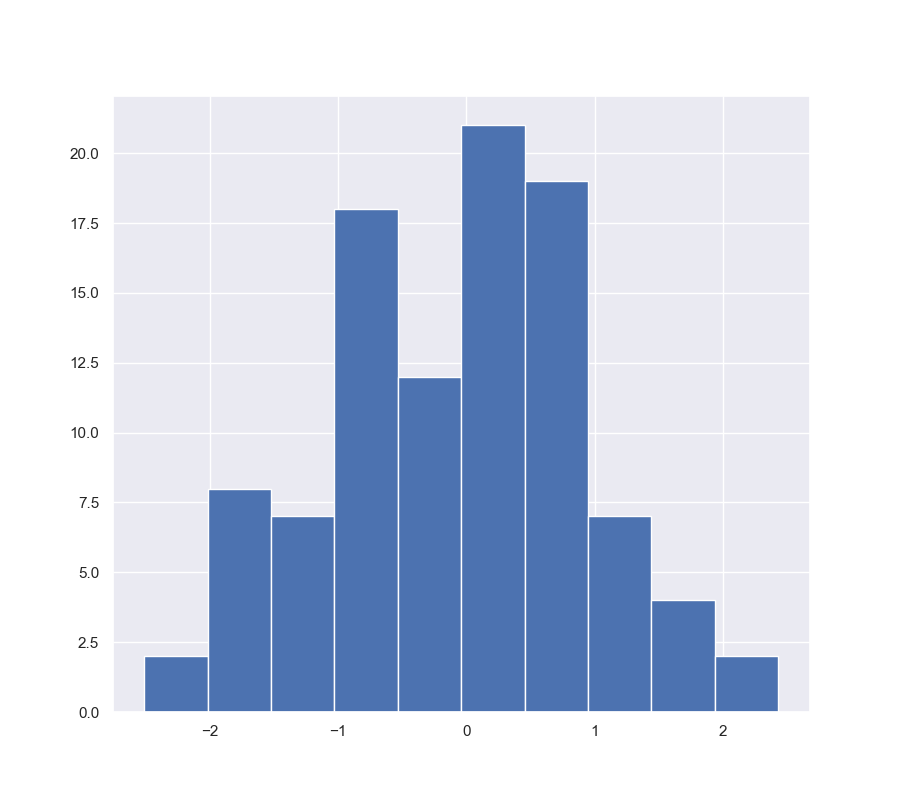

Optimization terminated successfully.
         Current function value: 100.868424
         Iterations: 21
         Function evaluations: 42

Sum of Least-Squared Deviations = -0.08197021484375
simple average formula = -0.08197189633971344
relative difference = 2.0513289127509662e-05



In [13]:
#!python
#!/usr/bin/env python
import numpy as np
import seaborn as sns
from scipy.io import loadmat
from scipy.stats import norm
from scipy.optimize import fmin
sns.set()

# load MATLAB data file
Drand = loadmat("Drand.mat")
Data  = Drand["Drand"]


import matplotlib.pyplot as plt
fig = plt.figure( figsize=(9, 8) \
                , dpi= 75 \
                , facecolor='w' \
                , edgecolor='w' \
                ) # create figure object
ax = fig.add_subplot(1,1,1) # Get the axes instance

plt.hist(Data)

plt.show()

# find the parameters of Gaussian distribution

def getSumDistSq(meanValue):
    sumDistSq = np.sum( (Data-meanValue)**2 );
    return sumDistSq

bestMeanValue = fmin( func = getSumDistSq
                    , x0 = 10
                    )
bestMeanValue = bestMeanValue[0]
simpleMean = np.sum(Data)/len(Data)
print( """
Sum of Least-Squared Deviations = {}
simple average formula = {}
relative difference = {}
""".format( bestMeanValue
          , simpleMean
          , 2*abs( (bestMeanValue-simpleMean) / (bestMeanValue+simpleMean) )
          )
     )

<IPython.core.display.Javascript object>


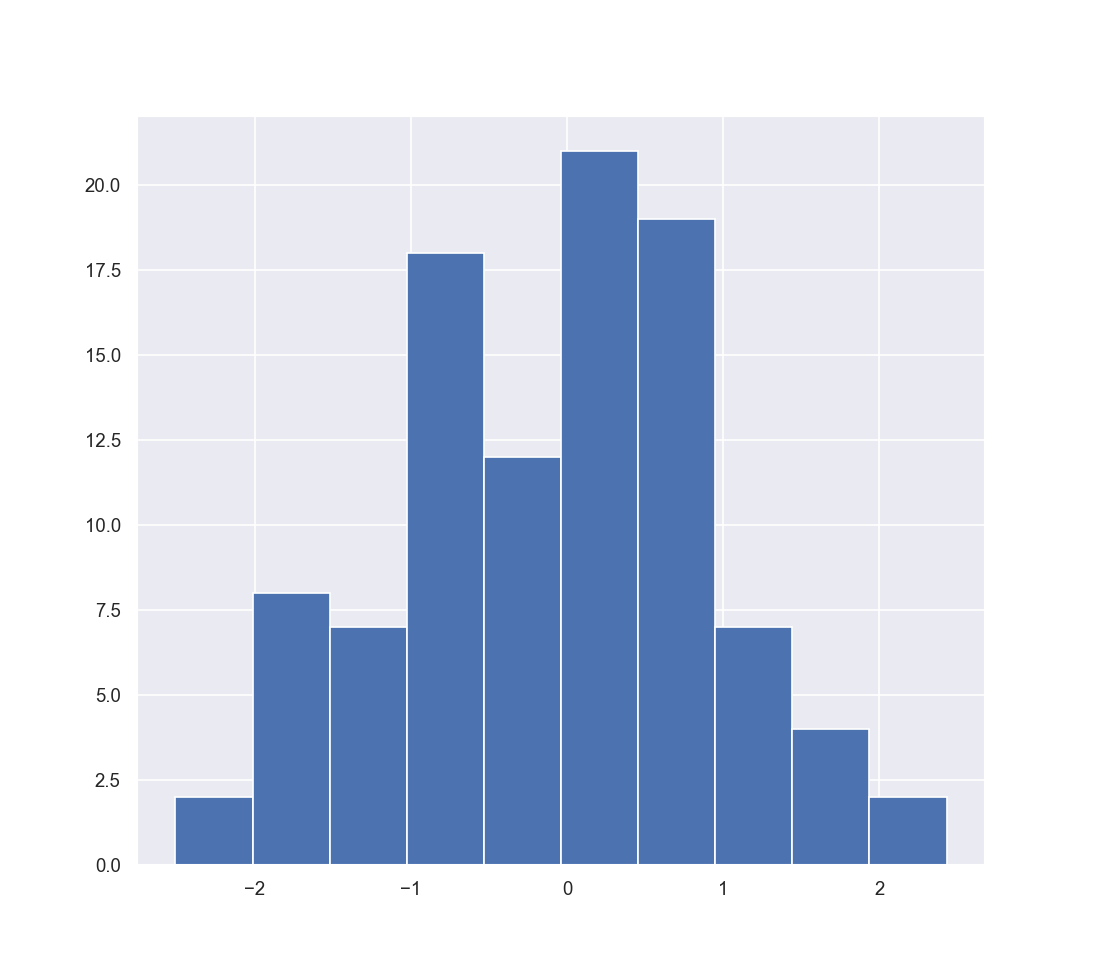

Optimization terminated successfully.
         Current function value: 81.133610
         Iterations: 14
         Function evaluations: 32

average via Sum of Least-Absolute Deviations = 0.0077500000000000025
simple average formula = -0.08197189633971344



In [19]:
#!python
#!/usr/bin/env python
import numpy as np
import seaborn as sns
from scipy.io import loadmat
from scipy.stats import norm
from scipy.optimize import fmin
sns.set()

# load MATLAB data file
Drand = loadmat("Drand.mat")
Data  = Drand["Drand"]


import matplotlib.pyplot as plt
fig = plt.figure( figsize=(9, 8) \
                , dpi= 75 \
                , facecolor='w' \
                , edgecolor='w' \
                ) # create figure object
ax = fig.add_subplot(1,1,1) # Get the axes instance

plt.hist(Data)

plt.show()

# find the parameters of Gaussian distribution

def getSumAbsDist(meanValue):
    sumDistSq = np.sum( np.abs(Data-meanValue) );
    return sumDistSq

bestMeanValue = fmin( func = getSumAbsDist
                    , x0 = 0
                    , xtol = 0.00001
                    , ftol = 0.00001
                    )
bestMeanValue = bestMeanValue[0]
simpleMean = np.sum(Data)/len(Data)
print( """
average via Sum of Least-Absolute Deviations = {}
simple average formula = {}
""".format( bestMeanValue
          , simpleMean
          )
     )